### PROYECTO FINAL: Aplicación de Machine Learning

#### 1. Selección de dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataframe = pd.read_excel('Dataset.xlsx')
dataframe.head()

Id FechaDesembolso  FlagMalo  RegionAgencia  NumInst_Total  \
0  2021007      2021-12-31         0              3              0   
1  1714432      2021-12-31         0              4              1   
2   258670      2021-12-31         0              4              0   
3  1073222      2021-12-31         0              4              2   
4  1034029      2021-12-31         1              4              0   

   NumOpe_Total  ContBanc_Hist  MaxDeudaMora_U24M  Sal_Acu_U24M  \
0             0             40               0.00        400.02   
1             1             29               0.00     178147.75   
2             0             24               0.00       3961.80   
3             3             60           54799.75    1696673.49   
4             0             21               0.00      58915.39   

   PeorCalif_U6M  ...  DeudaTotalMora_U12M MaxMontoTC_SinBDA  \
0            0.0  ...                 0.00               0.0   
1            0.0  ...                 0.00               0.0   
2            0.0  ...                 0.00               0.0   
3            0.0  ...             52521.58               0.0   
4            0.0  ...                 0.00               0.0   

   SaldoCred_SinBDAeHip  ExclusivoTU            Inst_Max_Cap_3M  \
0                  0.00            1                SUPER FACIL   
1               5897.23            0  BANCO DE DESARROLLO RURAL   
2                  0.00            1                          0   
3              76190.51            0  BANCO DE LOS TRABAJADORES   
4                  0.00            0  BANCO AZTECA DE GUATEMALA   

  ContBanc_Hist_Total  Antig_Bancarizado  PeorCalif_Hist  \
0                  40                  1             0.0   
1                  29                 20             0.0   
2                  24                  1             0.0   
3                  99                 99             2.0   
4                  55                 55             0.0   

         Inst_Max_End_Mayor0  ContBanc_3Mconsaldo  
0                        NaN                    1  
1  BANCO DE DESARROLLO RURAL                    3  
2                        NaN                    0  
3  BANCO DE LOS TRABAJADORES                    3  
4                        NaN                    2  

[5 rows x 28 columns]

#### 2. Análisis exploratorio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    8192 non-null   int64         
 1   FechaDesembolso       8192 non-null   datetime64[ns]
 2   FlagMalo              8192 non-null   int64         
 3   RegionAgencia         8192 non-null   int64         
 4   NumInst_Total         8192 non-null   int64         
 5   NumOpe_Total          8192 non-null   int64         
 6   ContBanc_Hist         8192 non-null   int64         
 7   MaxDeudaMora_U24M     8192 non-null   float64       
 8   Sal_Acu_U24M          8192 non-null   float64       
 9   PeorCalif_U6M         7238 non-null   float64       
 10  PeorCalif_U36M        7702 non-null   float64       
 11  Inst_Max_Cap          6489 non-null   object        
 12  MaxDeuda_U7_18M       8192 non-null   float64       
 13  Prom_Saldo_U18M   

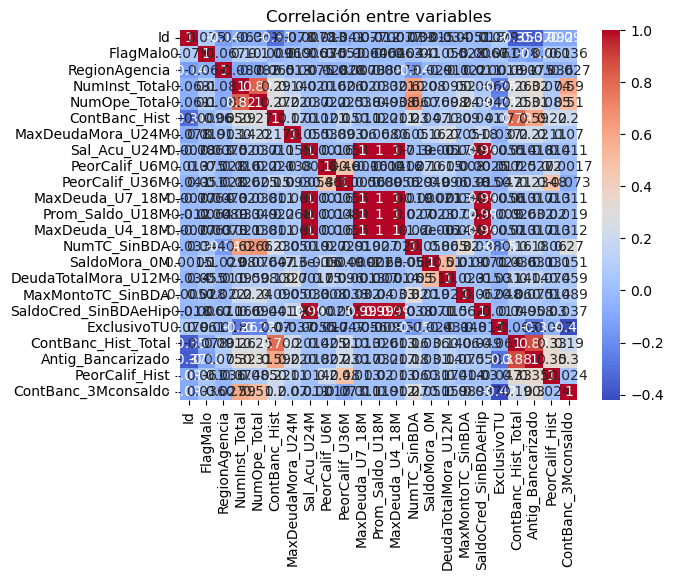

c:\Users\PC2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


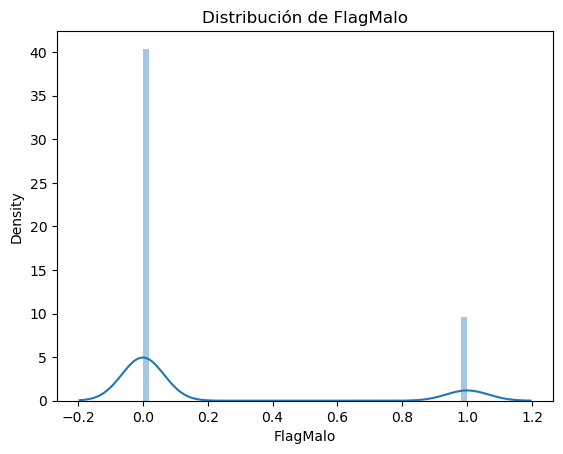

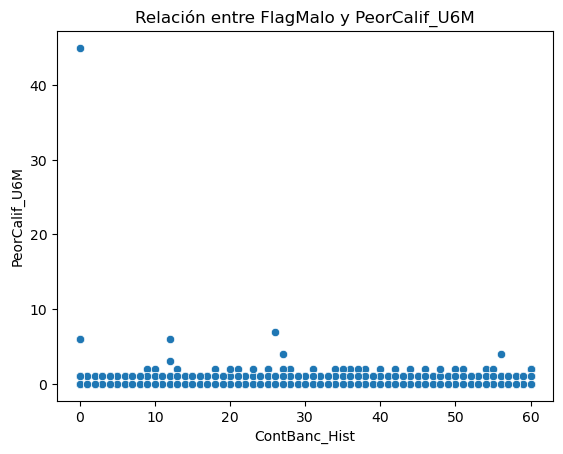

In [3]:


# Obtener información general del dataset
print(dataframe.info())

# Estadísticas descriptivas
print(dataframe.describe())

# Verificar valores nulos o faltantes
print(dataframe.isnull().sum())

# Gráfico de correlación
correlation = dataframe.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

# Gráfico de distribución
sns.distplot(dataframe['FlagMalo'])
plt.title('Distribución de FlagMalo')
plt.show()

# Gráfico de dispersión
sns.scatterplot(x='ContBanc_Hist', y='PeorCalif_U6M', data=dataframe)
plt.title('Relación entre FlagMalo y PeorCalif_U6M')
plt.show()

 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    8192 non-null   int64         
 1   FechaDesembolso       8192 non-null   datetime64[ns]
 2   FlagMalo              8192 non-null   int64         
 3   RegionAgencia         8192 non-null   int64         
 4   NumInst_Total         8192 non-null   int64         
 5   NumOpe_Total          8192 non-null   int64         
 6   ContBanc_Hist         8192 non-null   int64         
 7   MaxDeudaMora_U24M     8192 non-null   float64       
 8   Sal_Acu_U24M          8192 non-null   float64       
 9   PeorCalif_U6M         7238 non-null   float64       
 10  PeorCalif_U36M        7702 non-null   float64       
 11  Inst_Max_Cap          6489 non-null   object        
 12  MaxDeuda_U7_18M       8192 non-null   float64       
 13  Prom_Saldo_U18M   

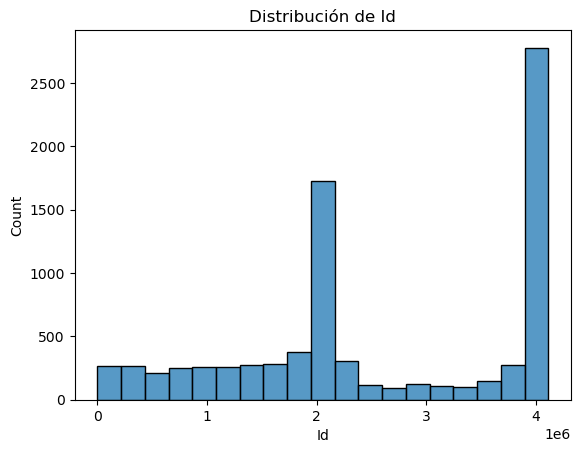

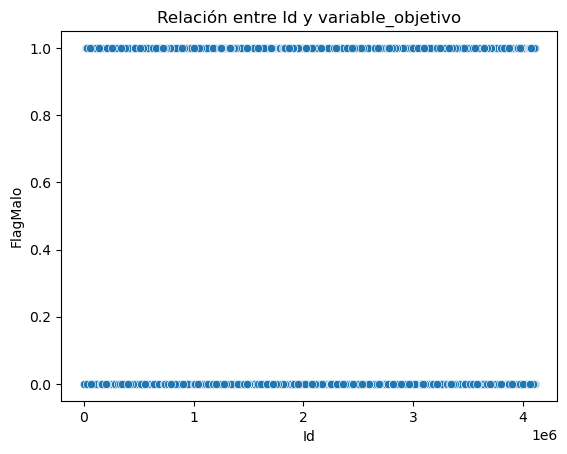

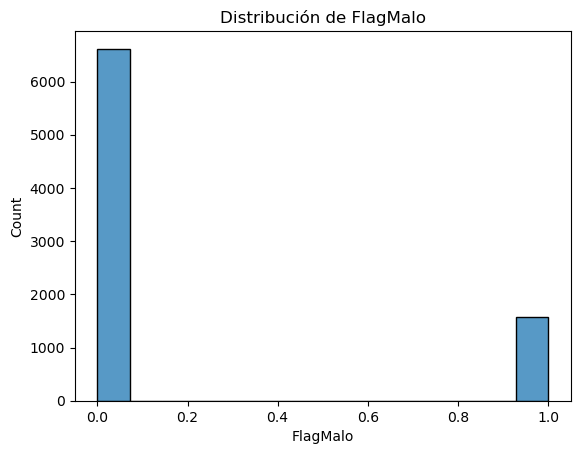

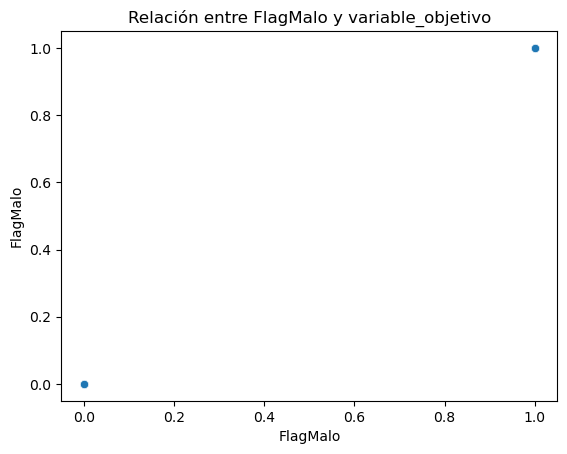

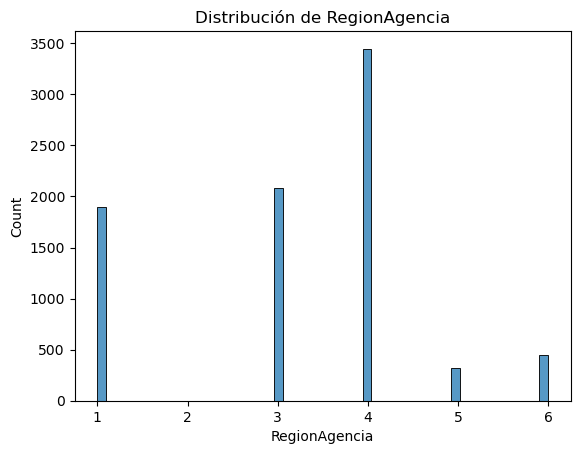

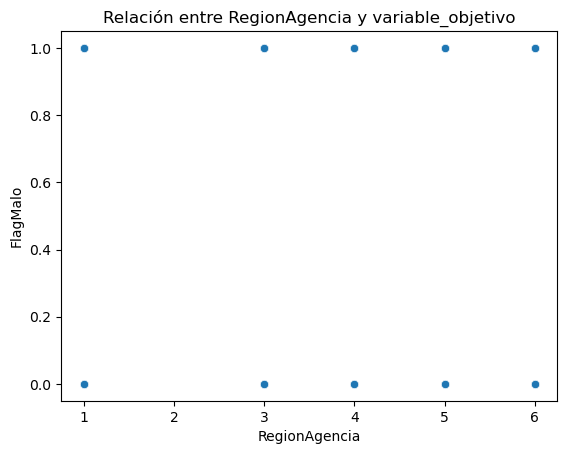

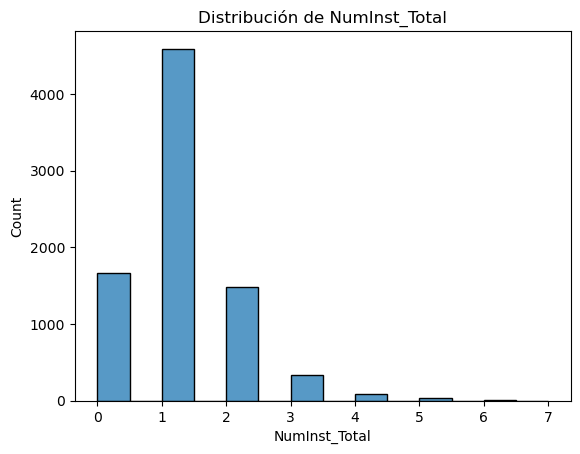

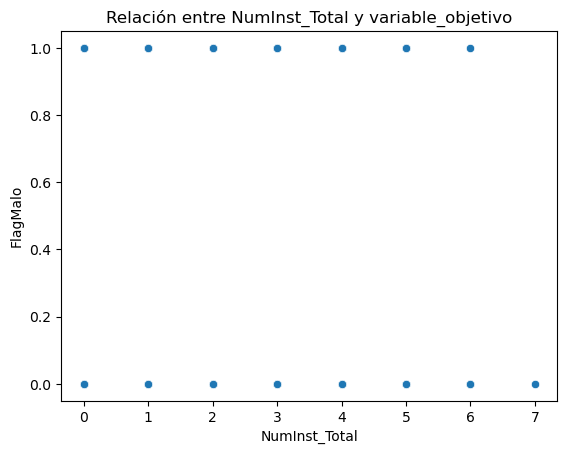

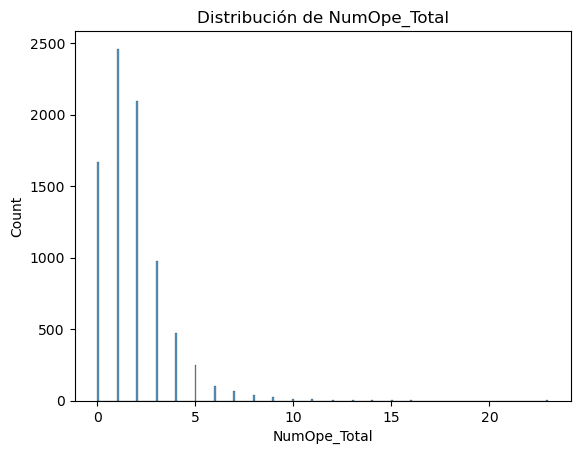

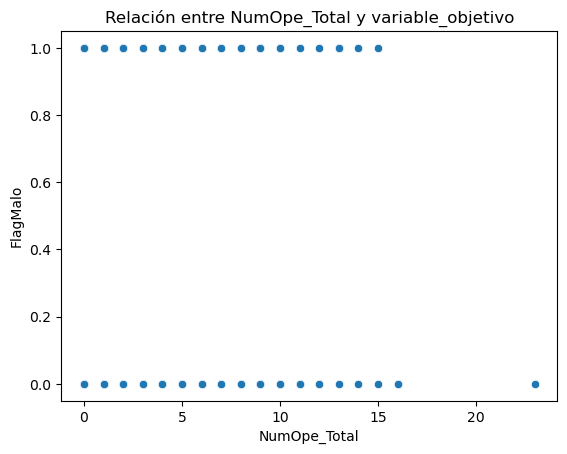

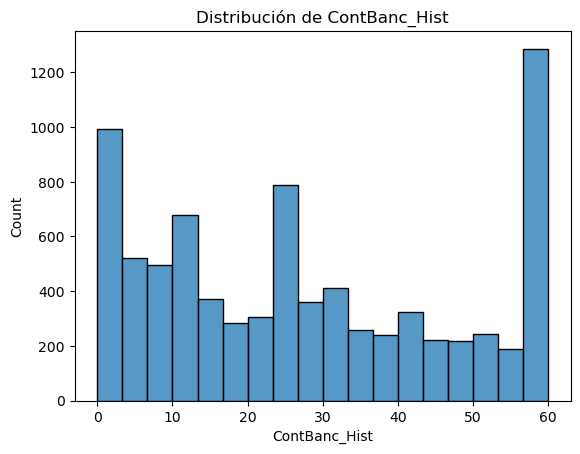

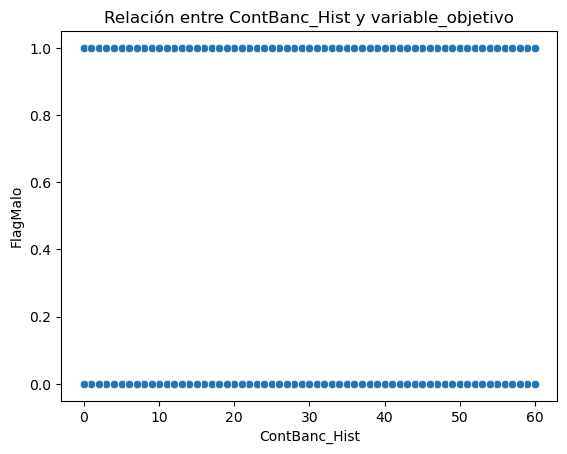

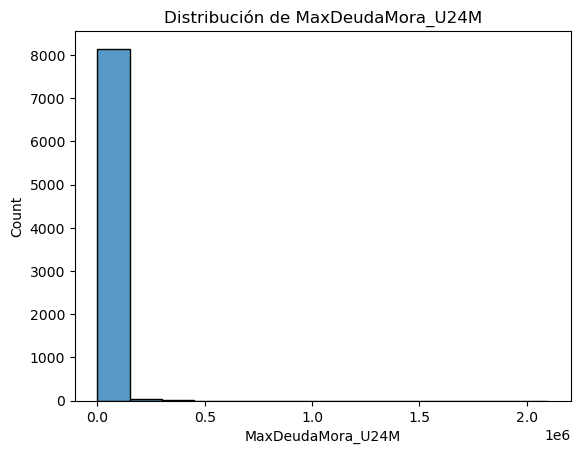

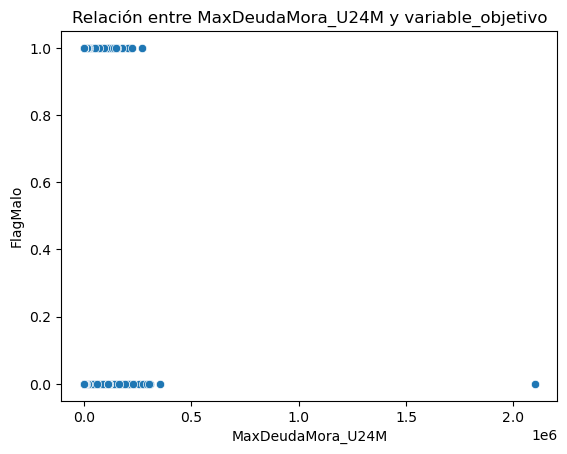

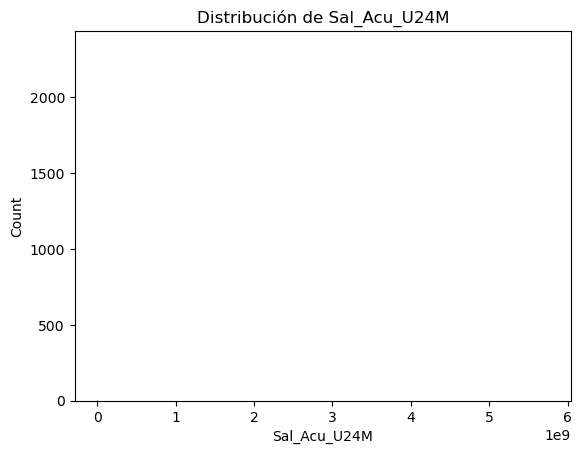

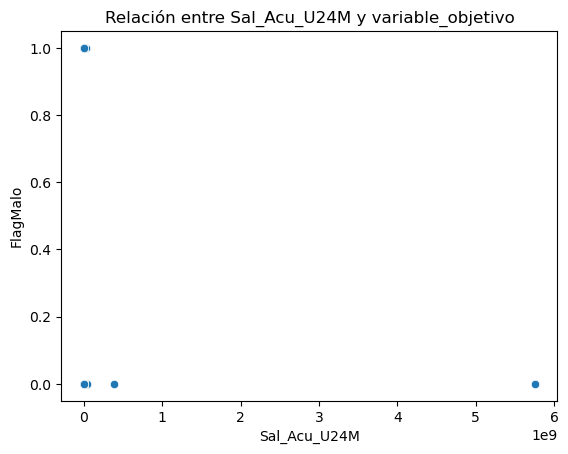

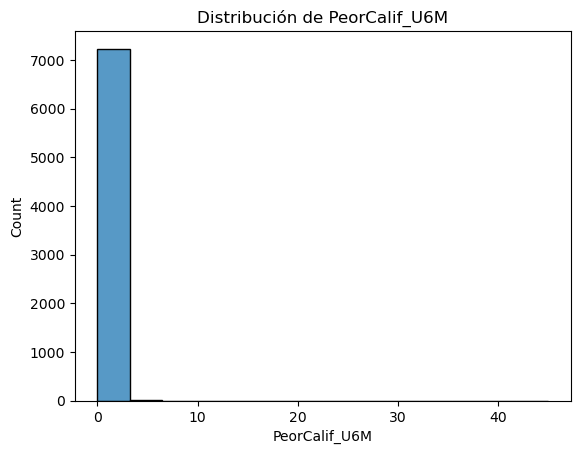

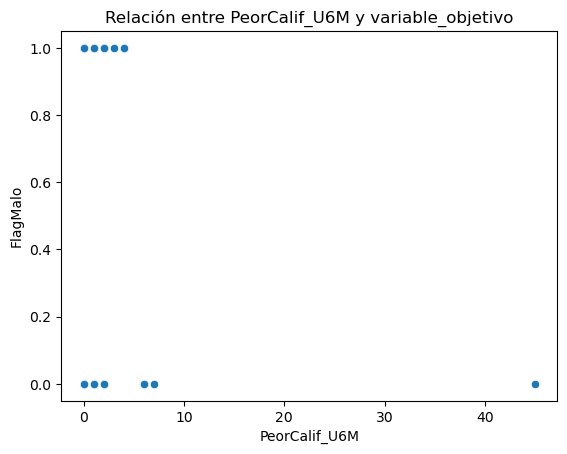

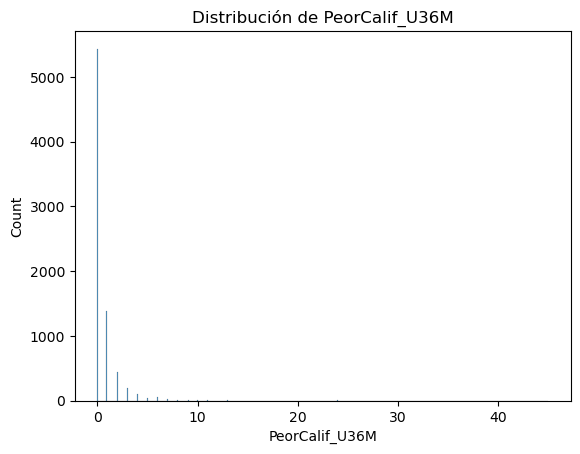

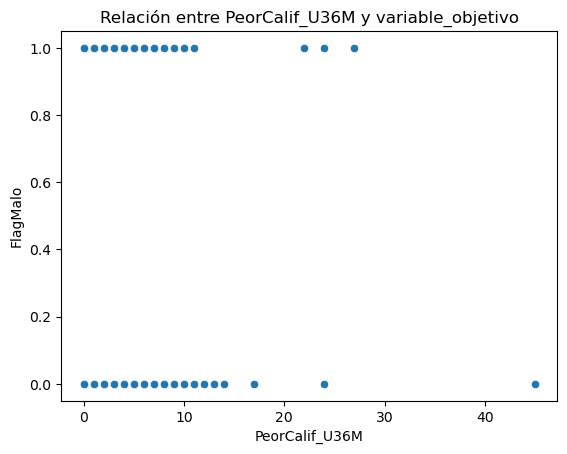

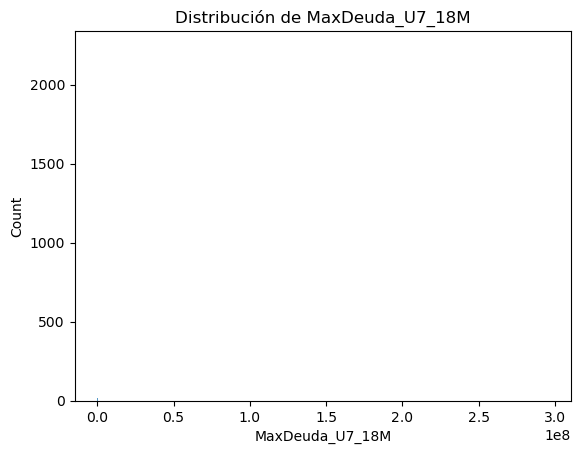

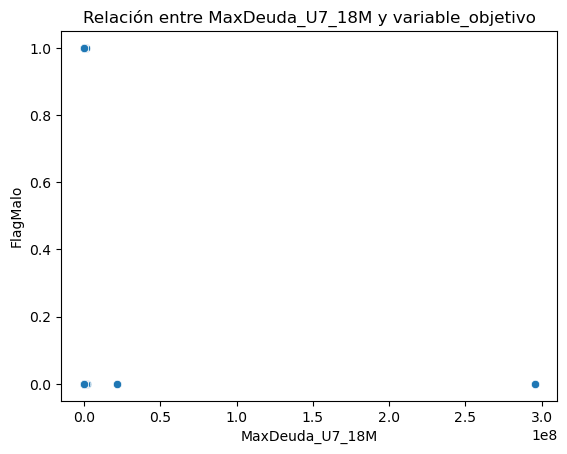

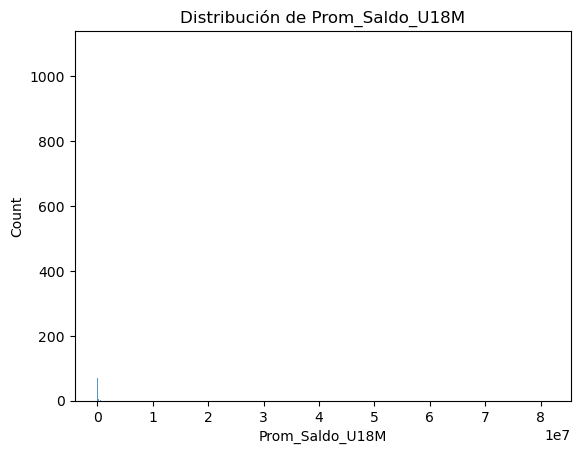

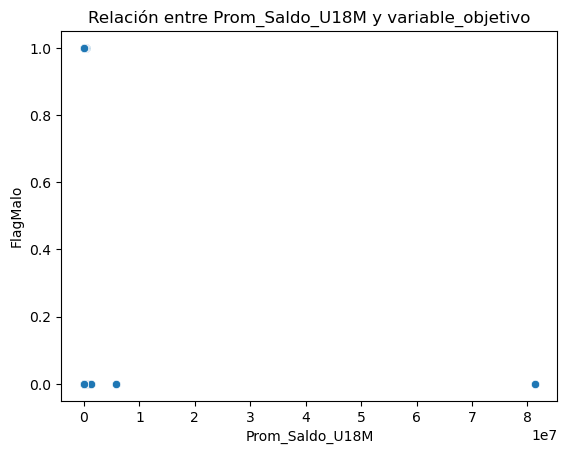

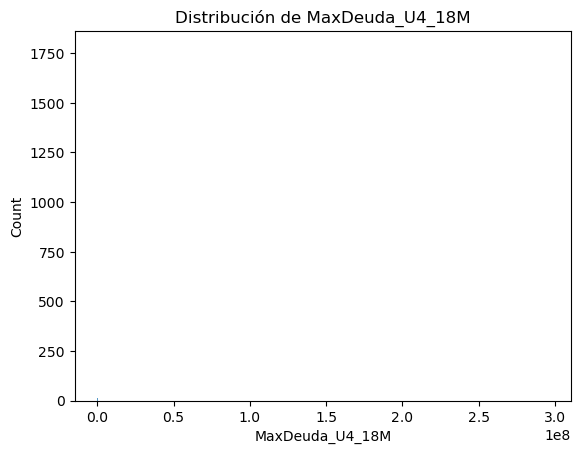

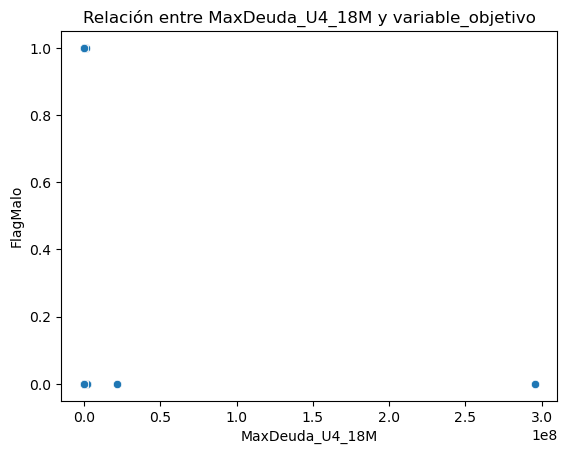

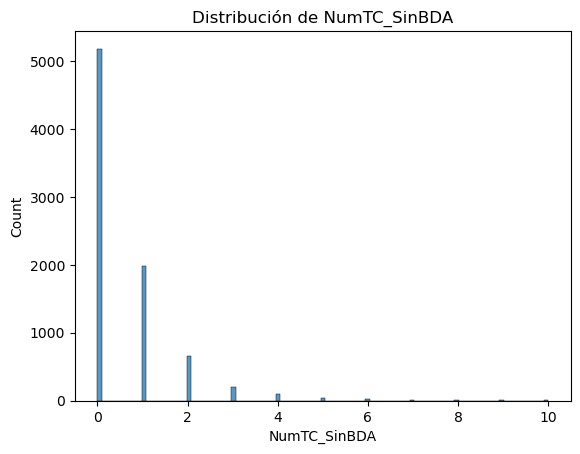

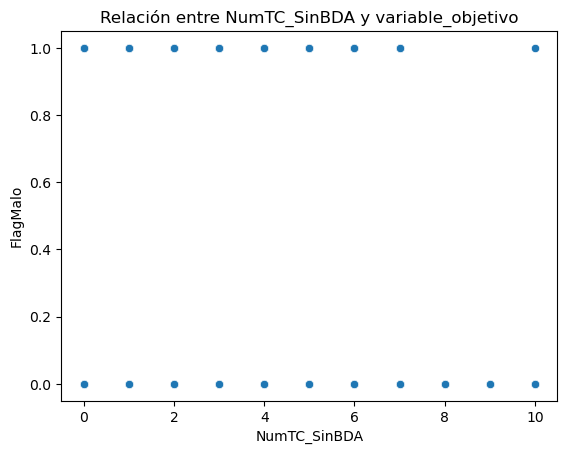

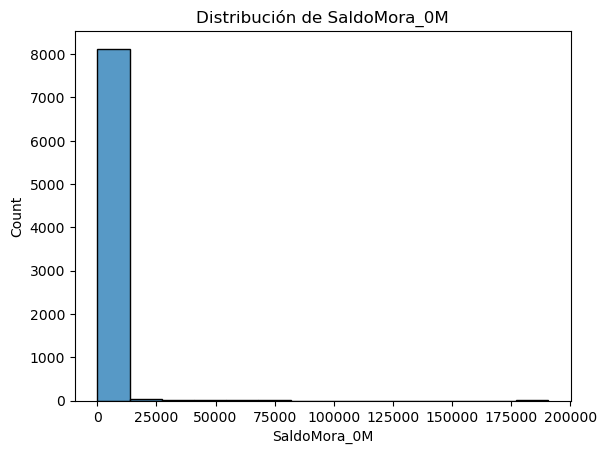

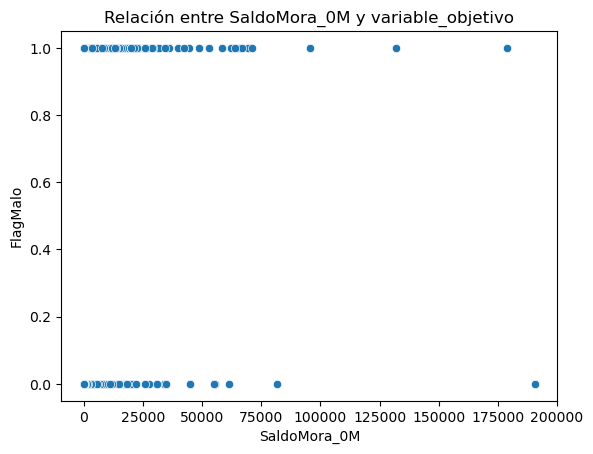

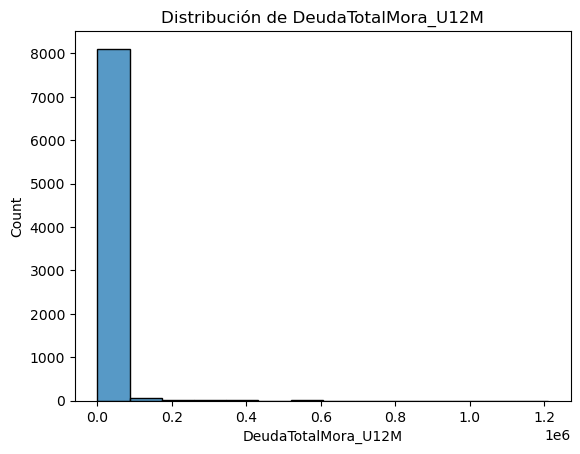

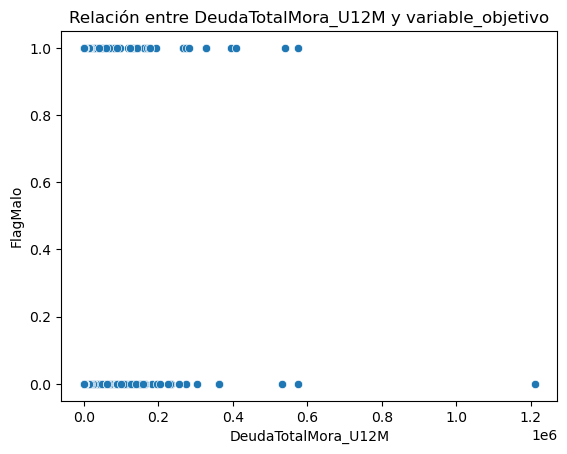

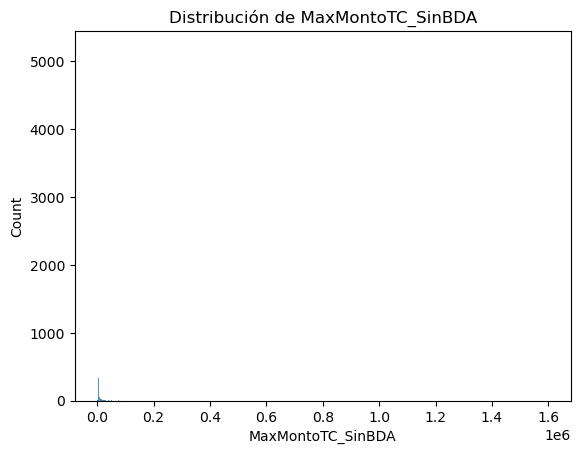

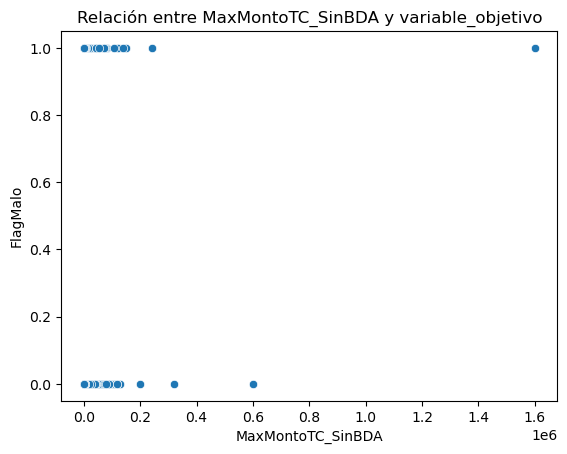

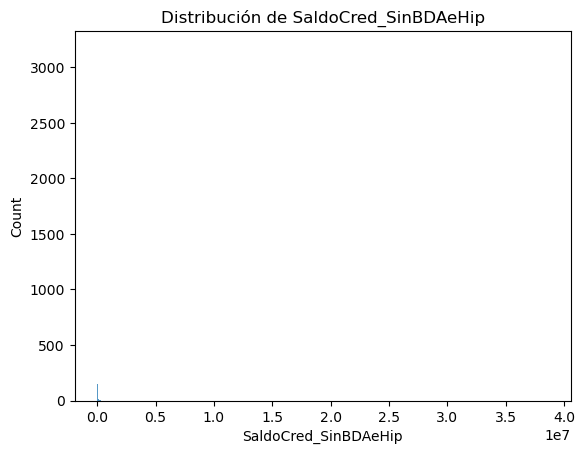

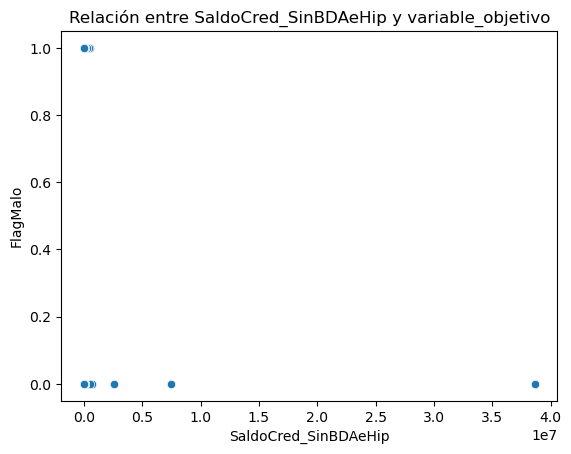

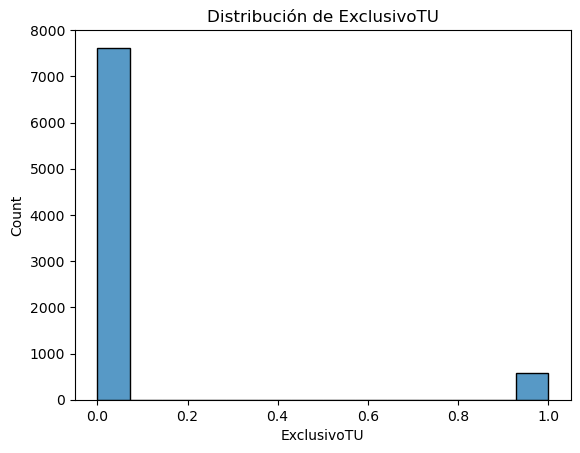

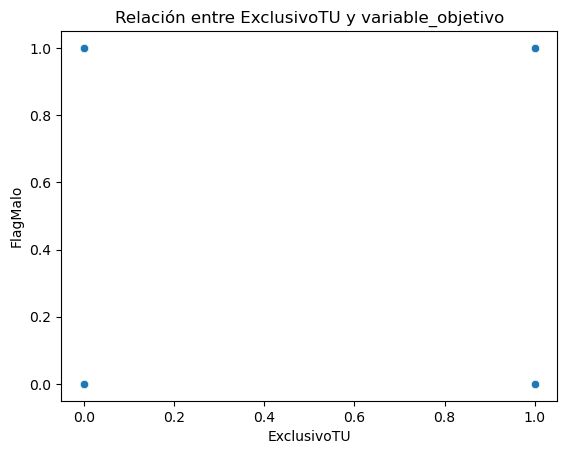

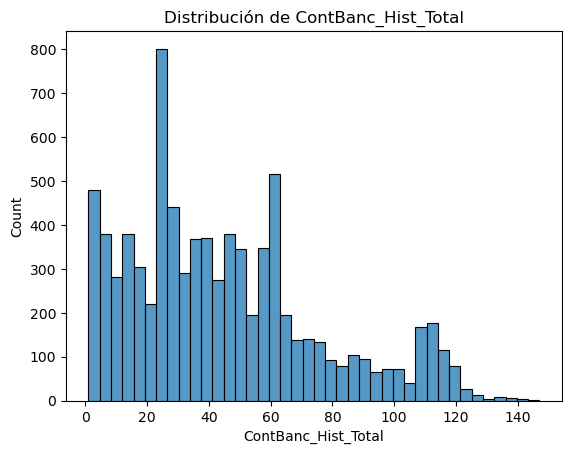

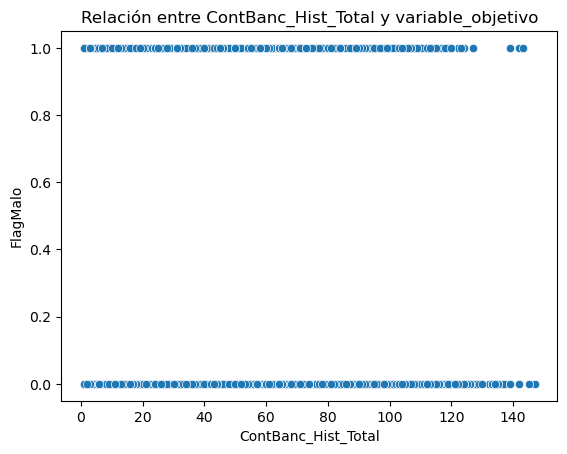

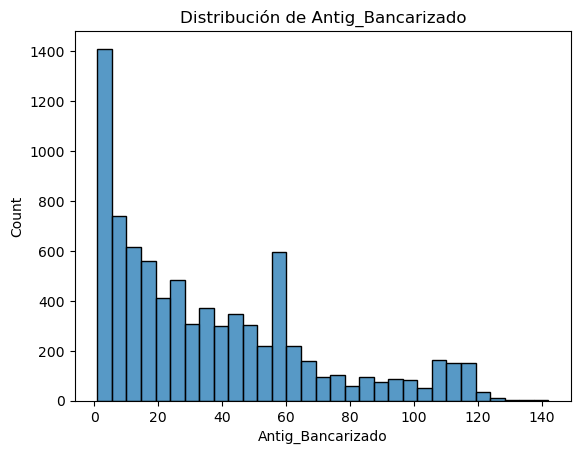

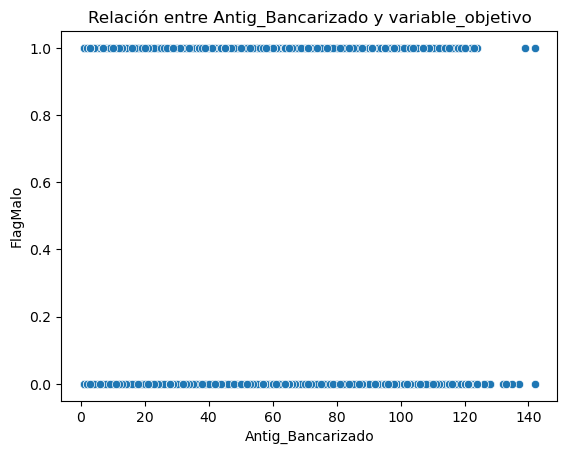

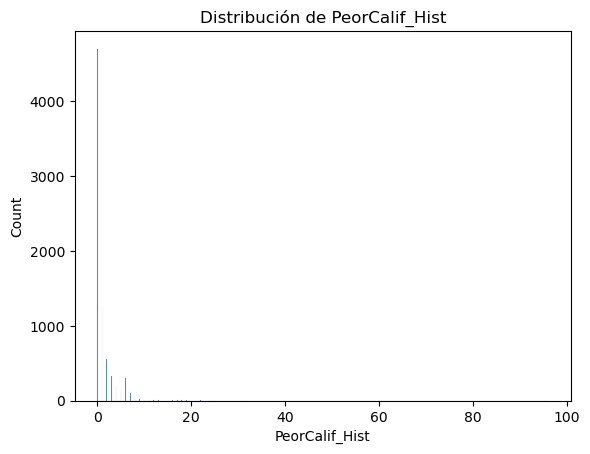

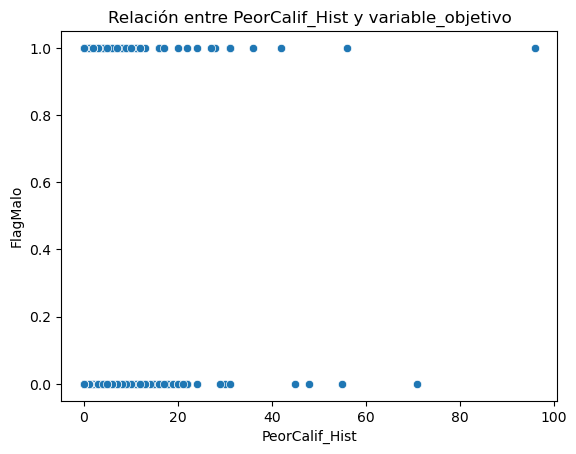

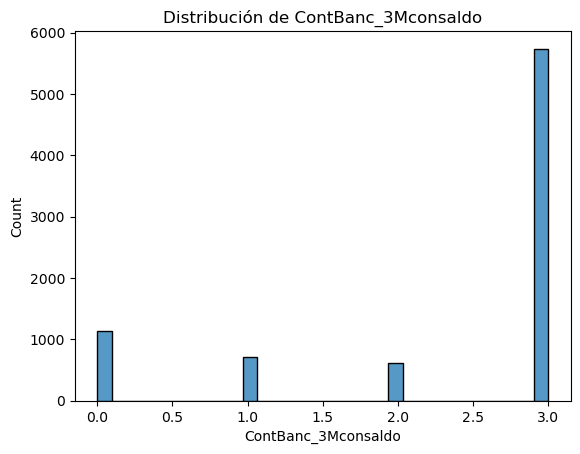

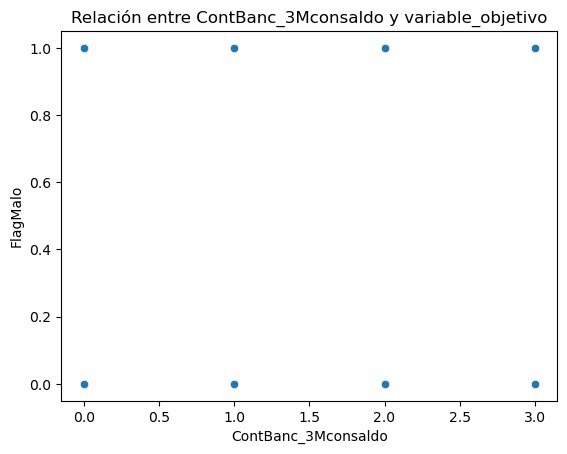

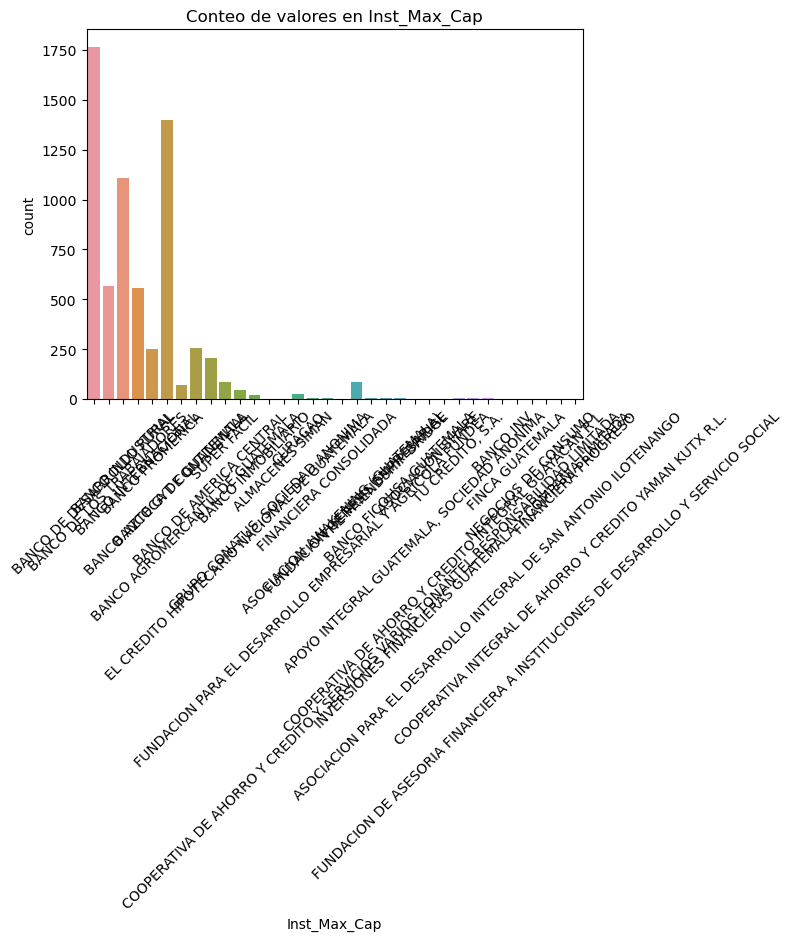

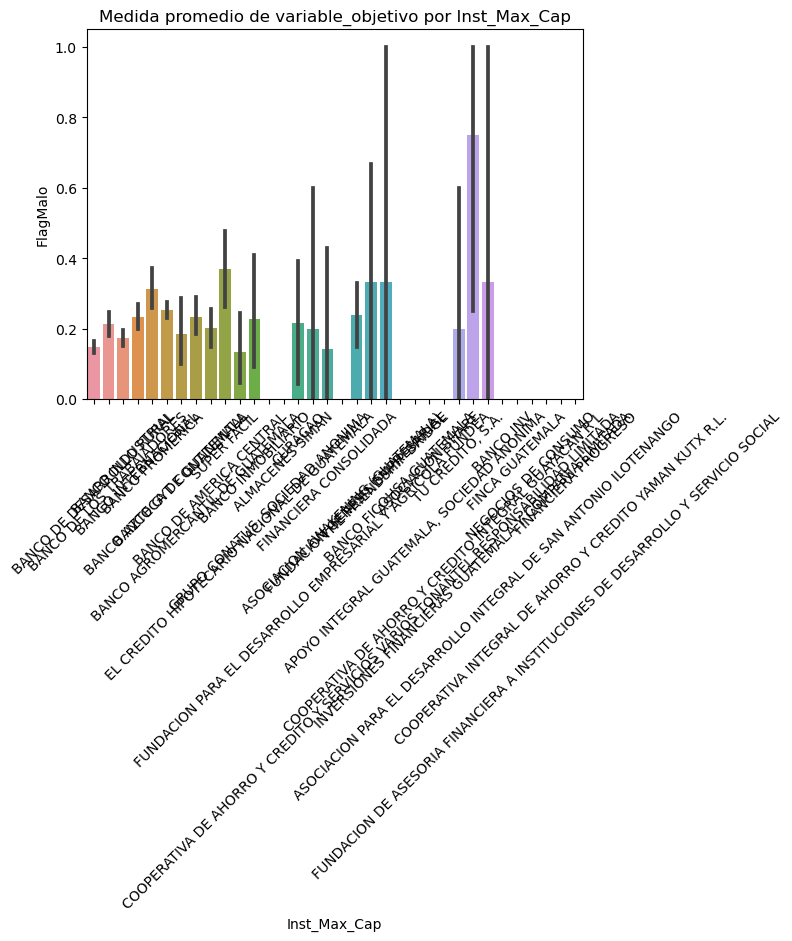

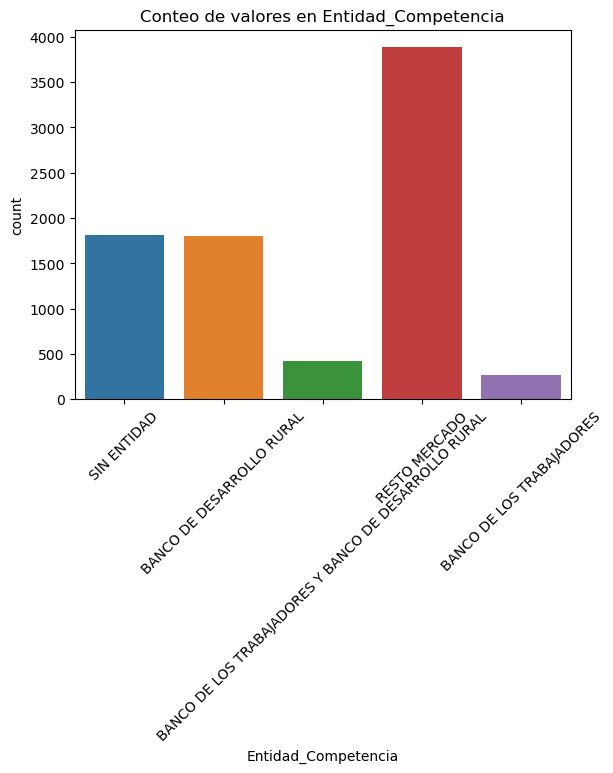

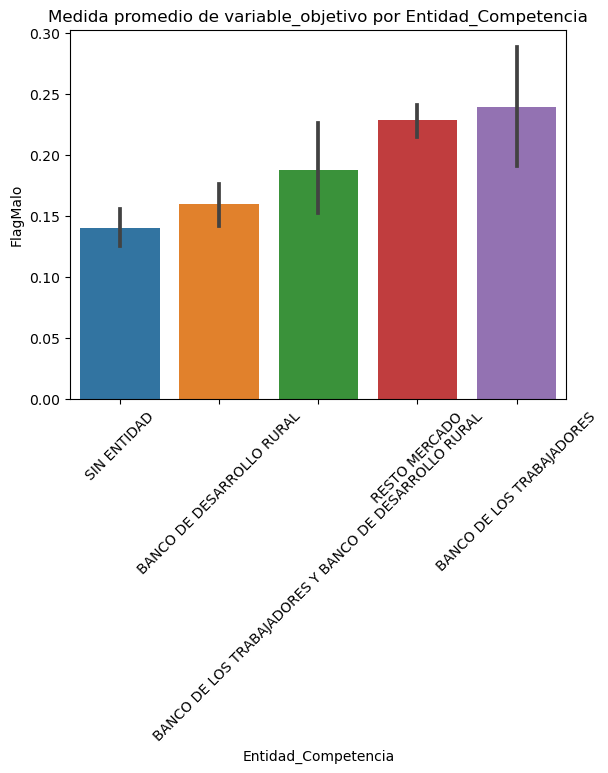

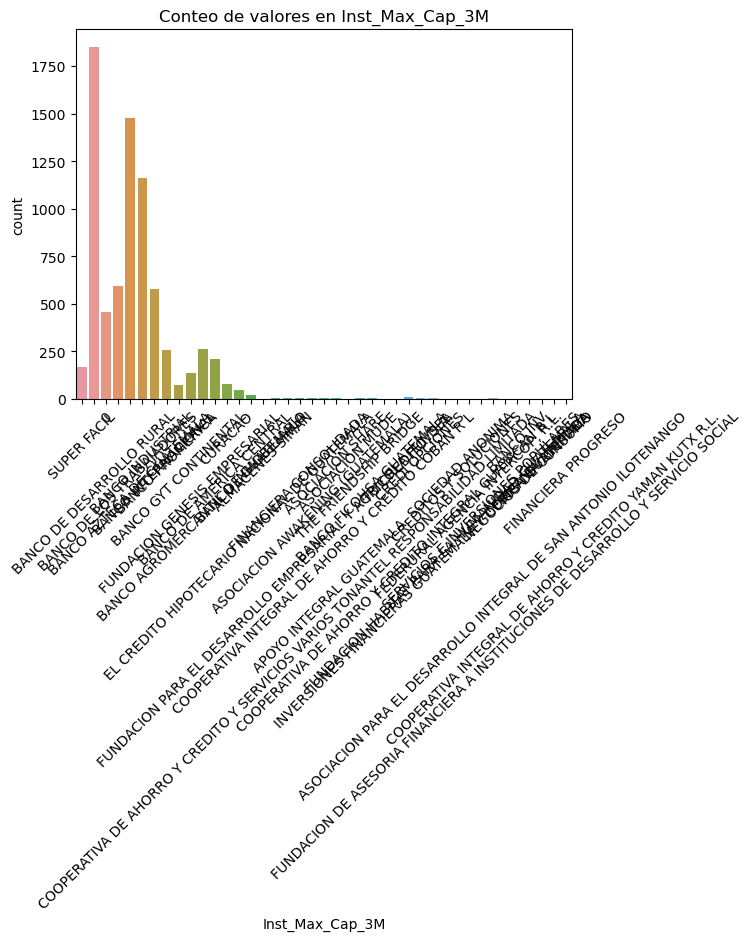

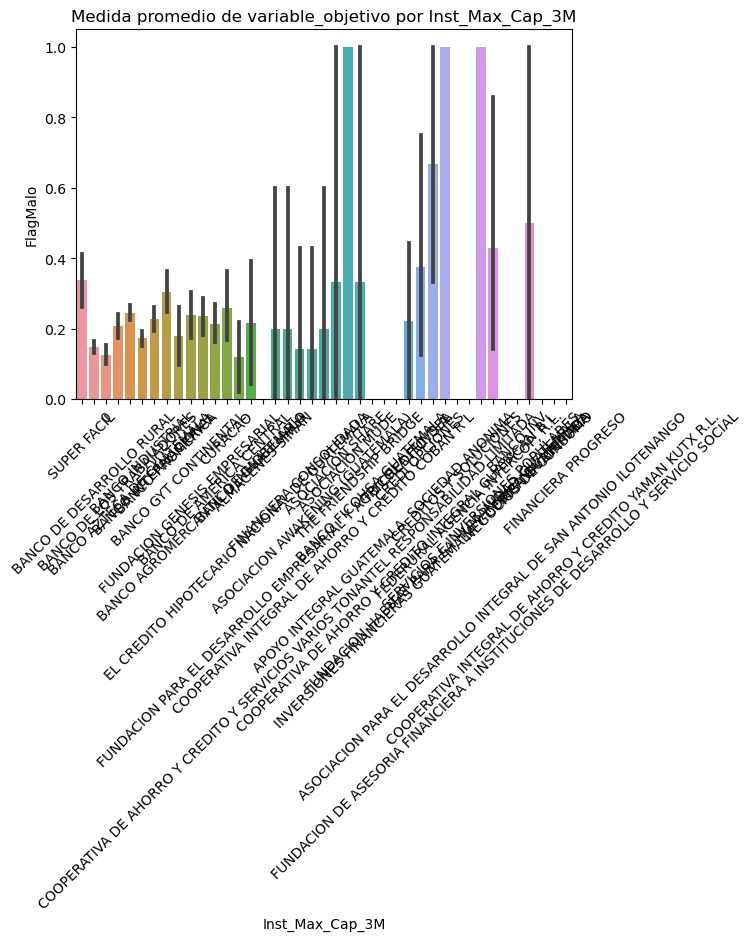

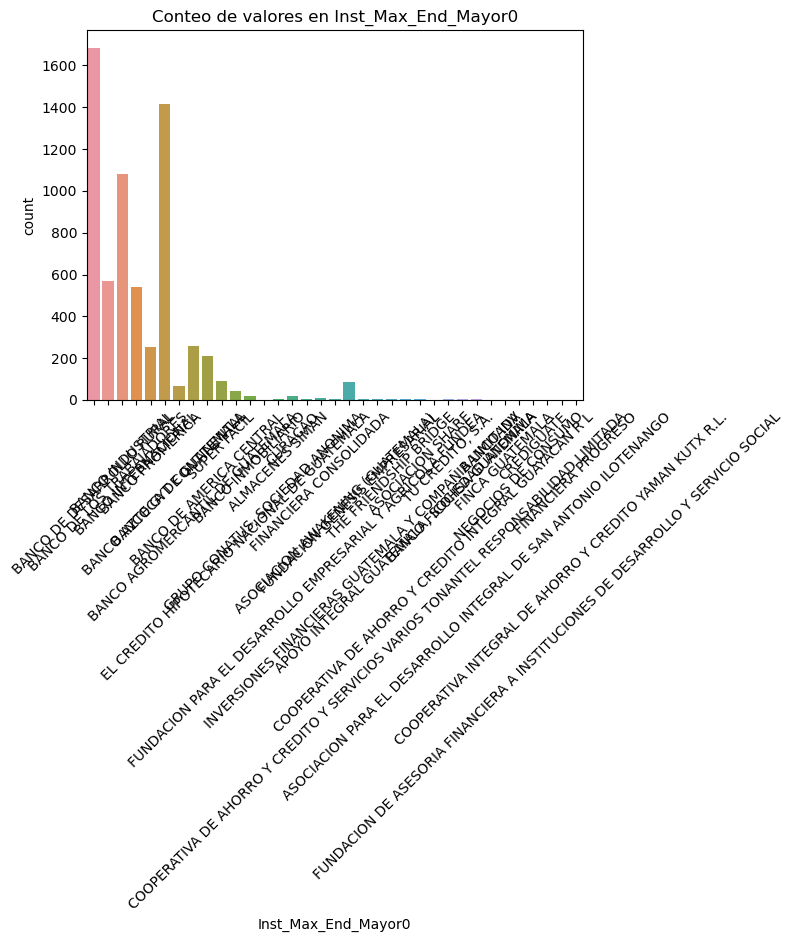

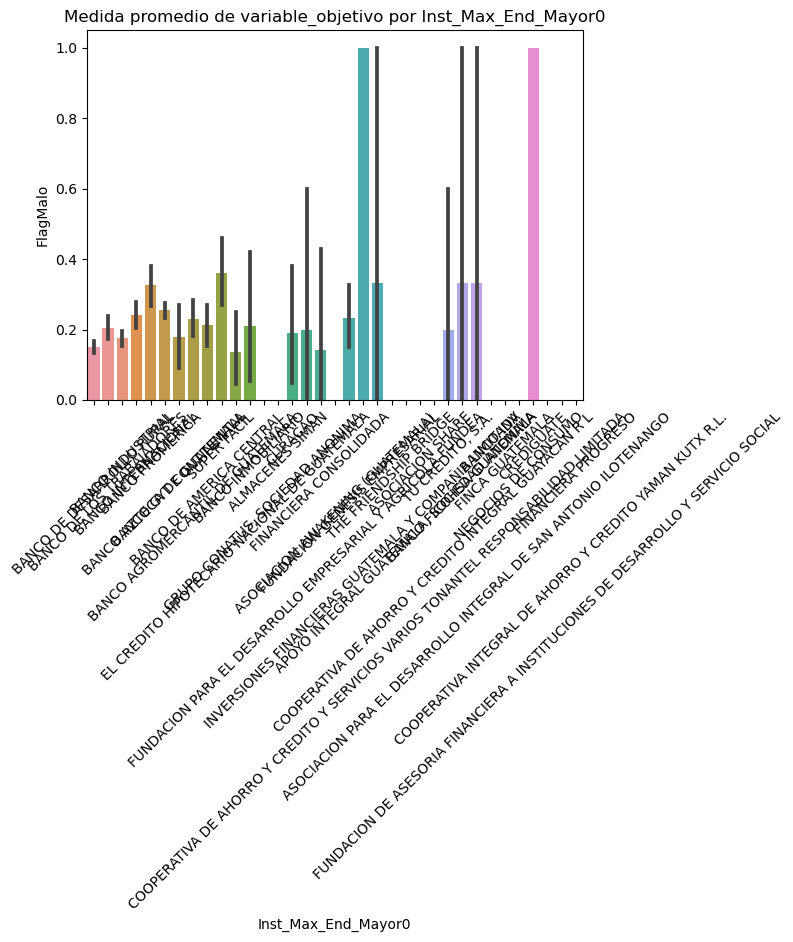

In [4]:


# Obtener información general del dataset
print(dataframe.info())

# Estadísticas descriptivas de todas las variables numéricas
print(dataframe.describe())

# Verificar valores nulos o faltantes
print(dataframe.isnull().sum())

# Exploración gráfica de todas las variables numéricas
numeric_columns = dataframe.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    # Gráfico de distribución
    sns.histplot(dataframe[column])
    plt.title(f'Distribución de {column}')
    plt.show()

    # Gráfico de dispersión en relación a una variable objetivo (si aplica)
    sns.scatterplot(x=column, y='FlagMalo', data=dataframe)
    plt.title(f'Relación entre {column} y variable_objetivo')
    plt.show()

 

# Exploración gráfica de todas las variables categóricas
categorical_columns = dataframe.select_dtypes(include=['object']).columns

for column in categorical_columns:

    # Gráfico de conteo

    sns.countplot(x=column, data=dataframe)
    plt.title(f'Conteo de valores en {column}')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de barras en relación a una variable objetivo (si aplica)
    sns.barplot(x=column, y='FlagMalo', data=dataframe)
    plt.title(f'Medida promedio de variable_objetivo por {column}')
    plt.xticks(rotation=45)
    plt.show()